In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



import warnings
warnings.filterwarnings('ignore')




In [5]:
df = pd.read_csv('/content/drive/MyDrive/MCP_Data_file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [8]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [9]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [10]:
df.pcircle.value_counts()

UPW    209593
Name: pcircle, dtype: int64

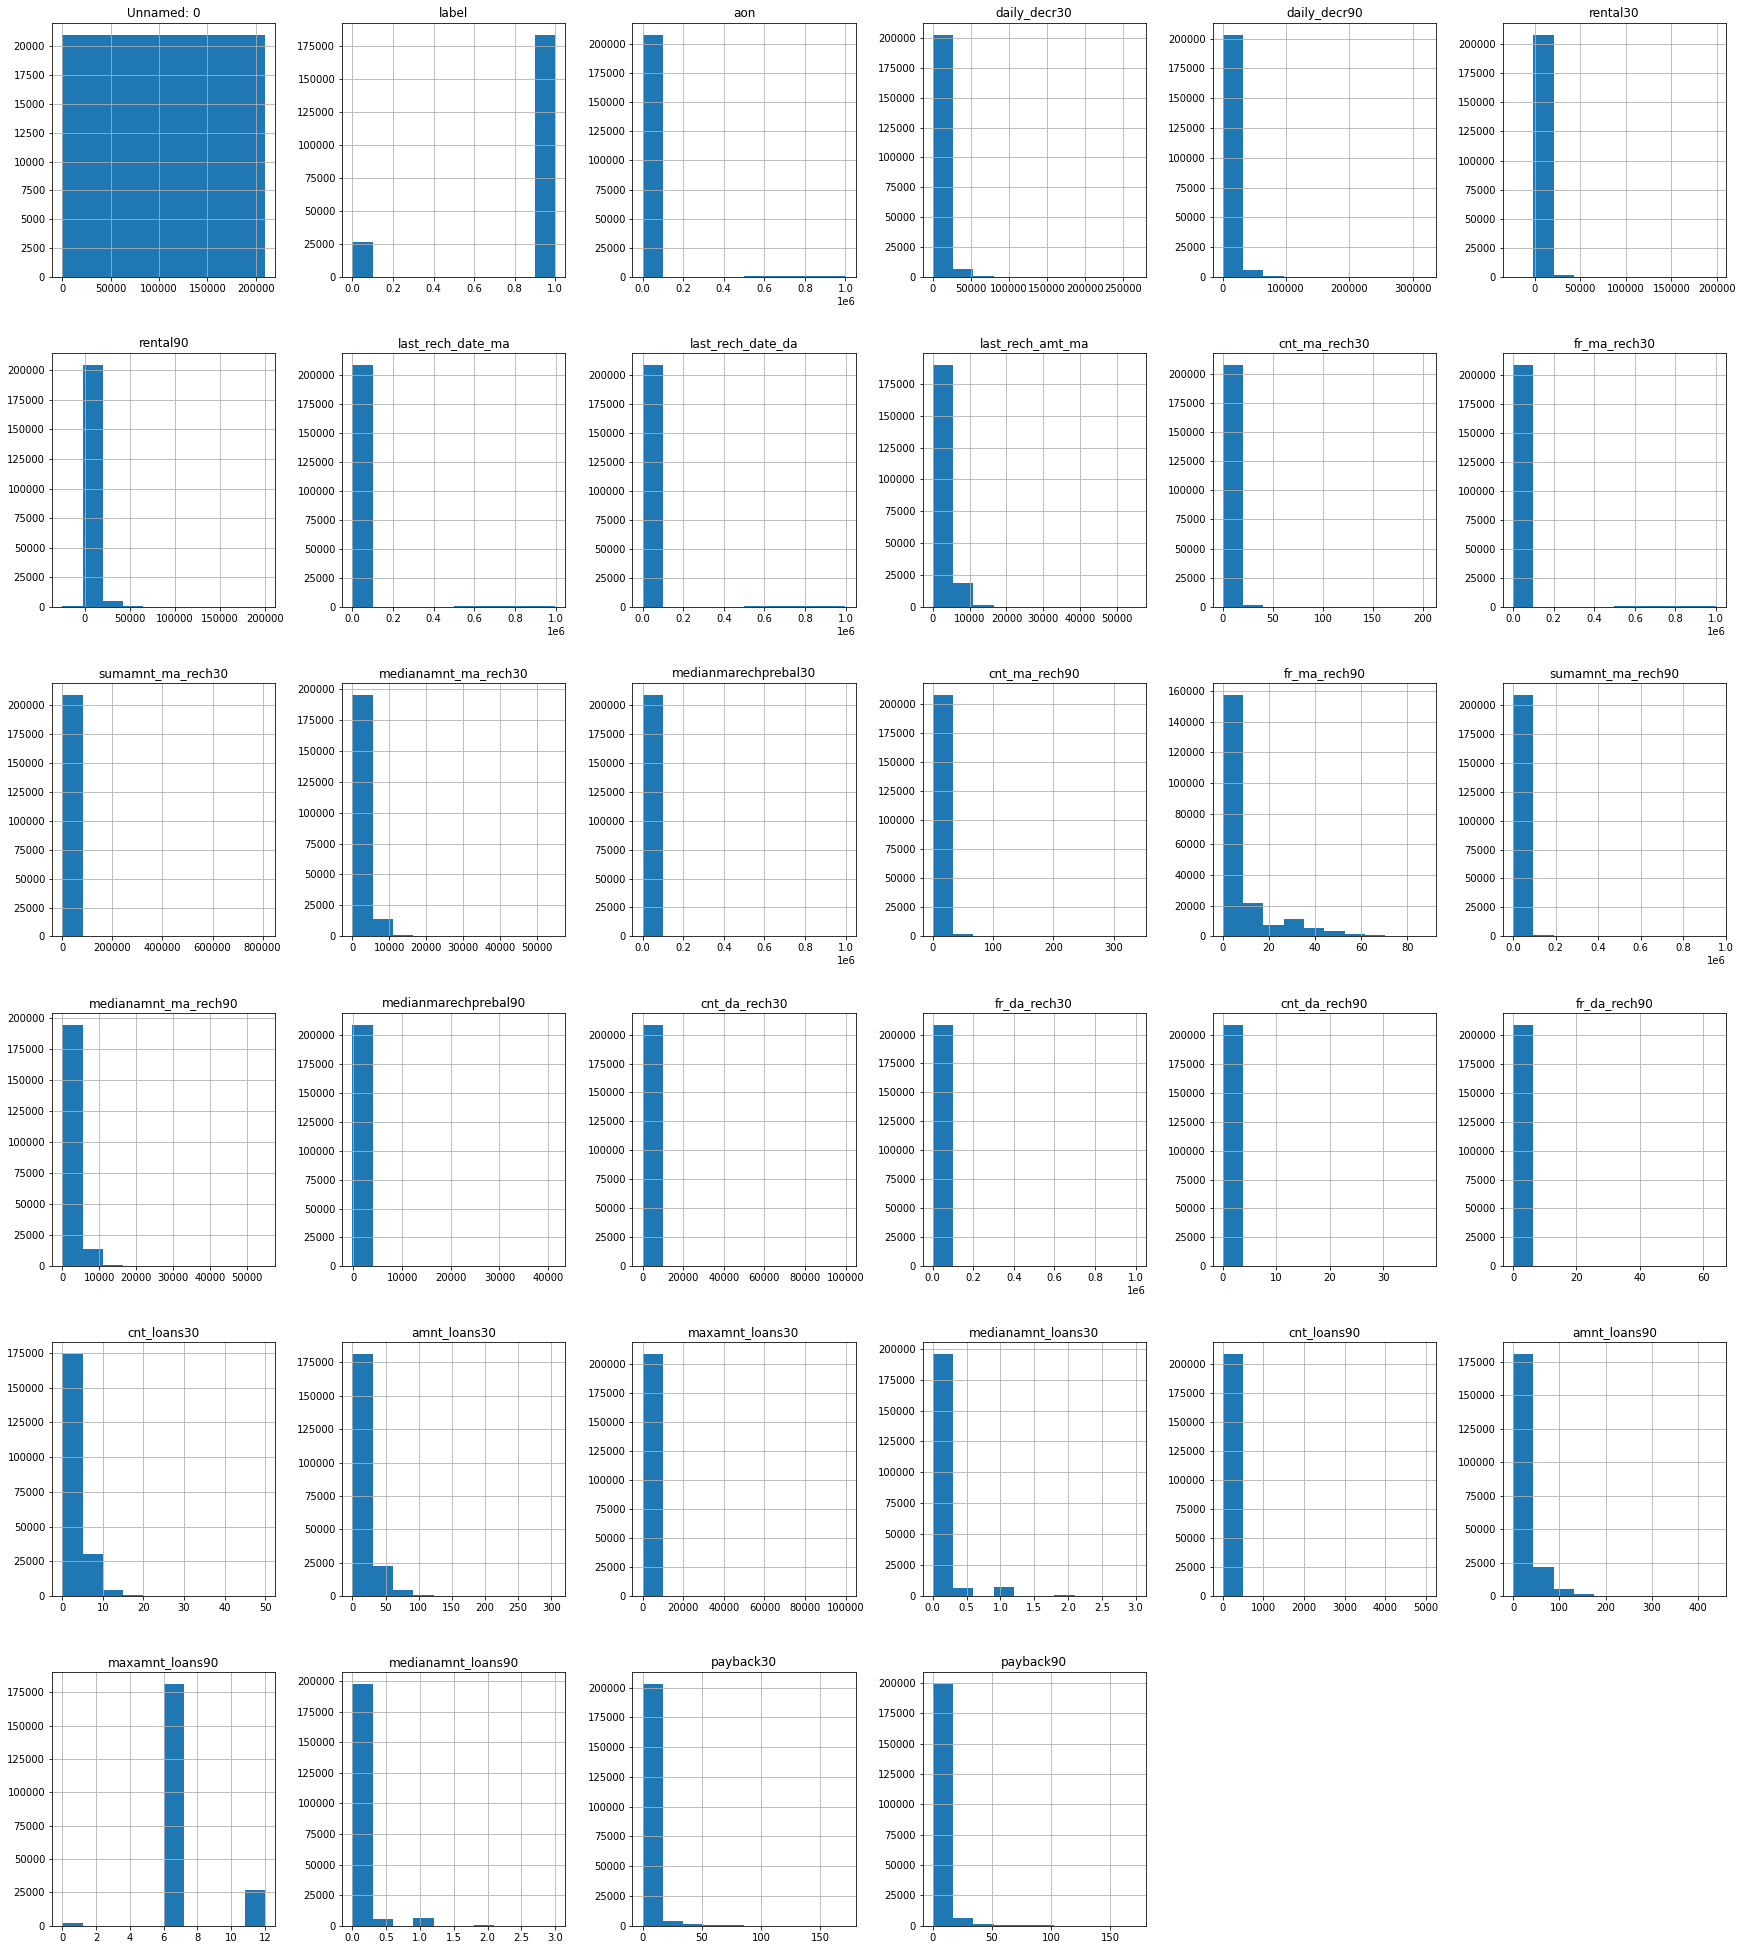

In [11]:
df.hist(figsize=(30,35));

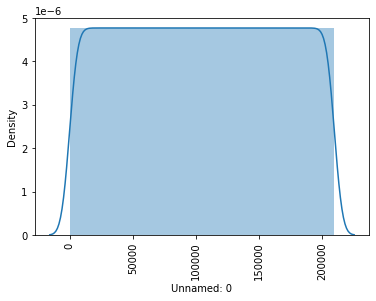

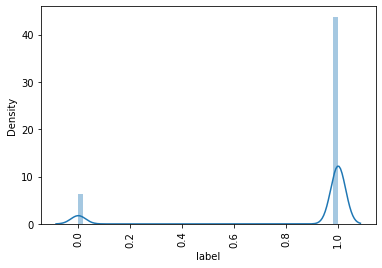

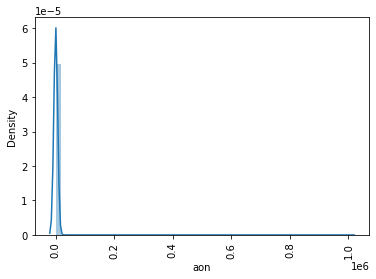

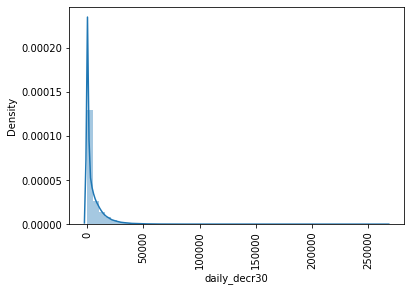

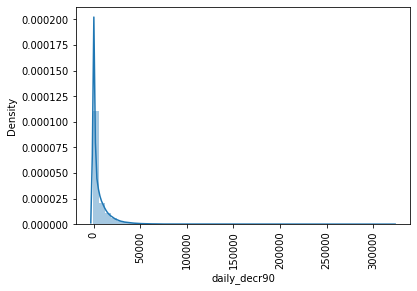

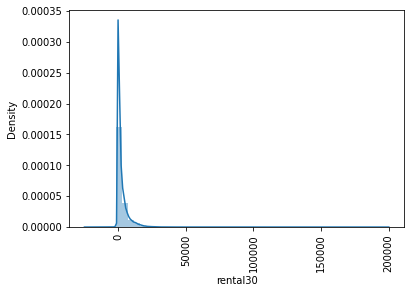

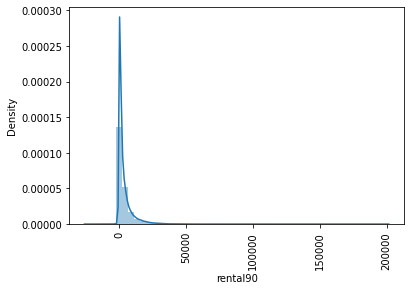

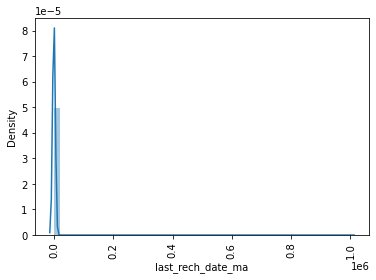

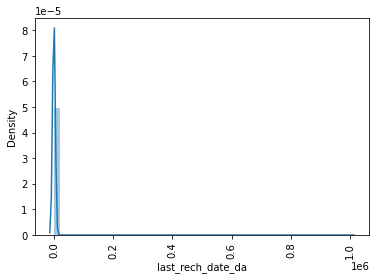

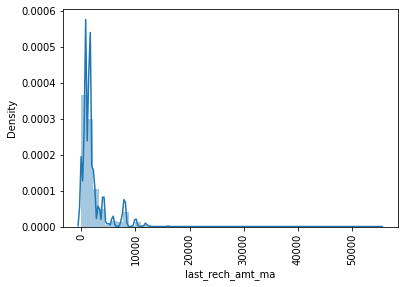

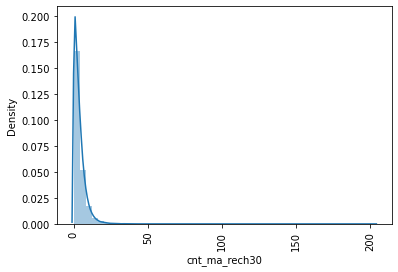

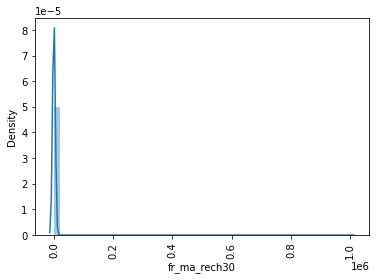

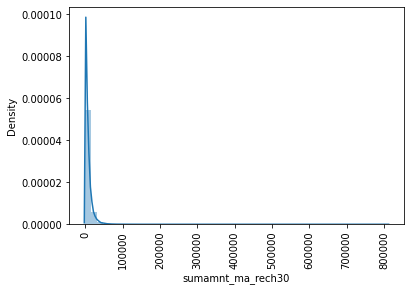

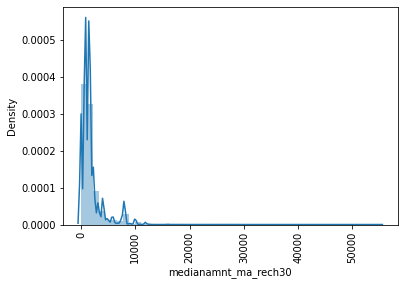

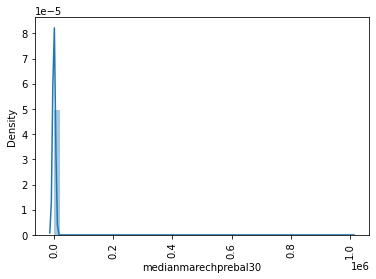

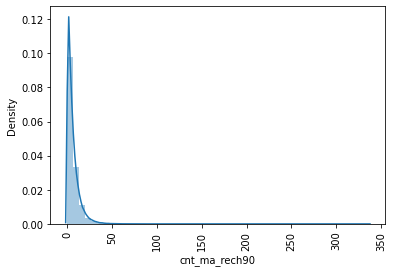

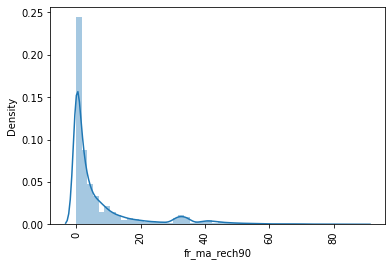

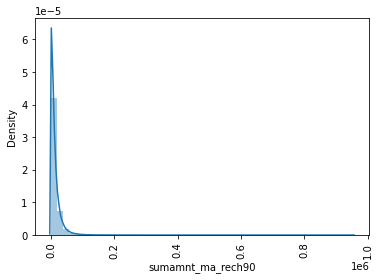

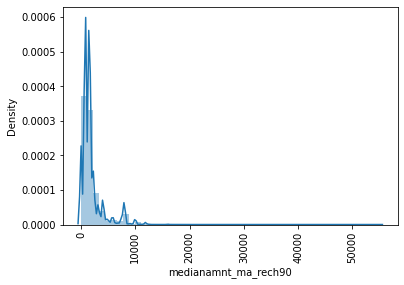

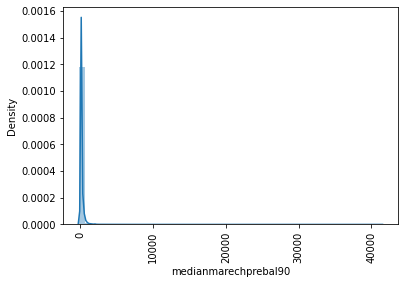

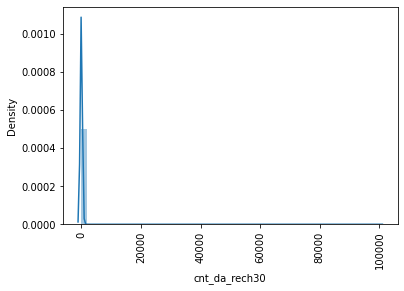

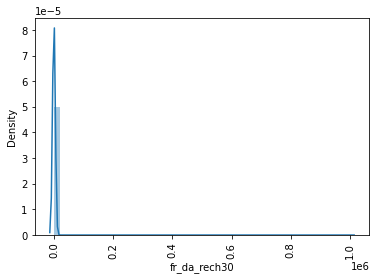

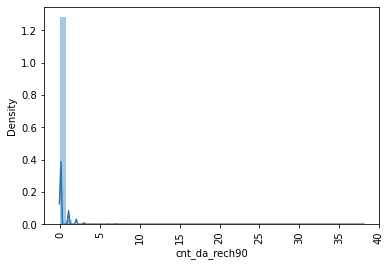

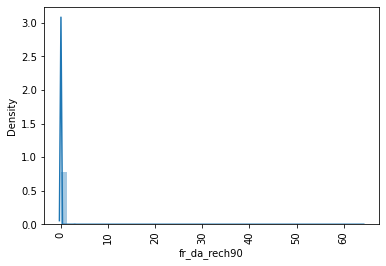

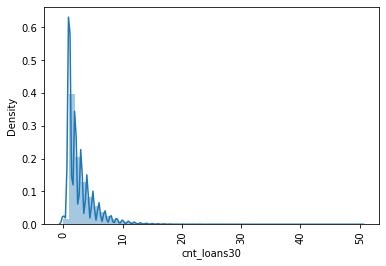

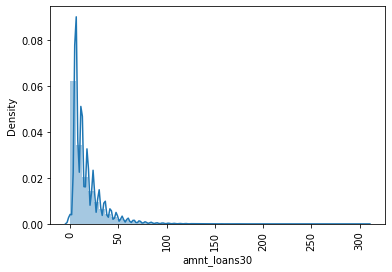

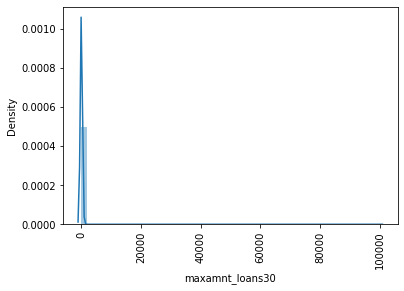

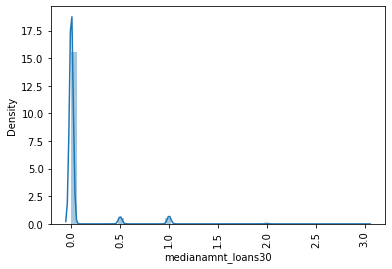

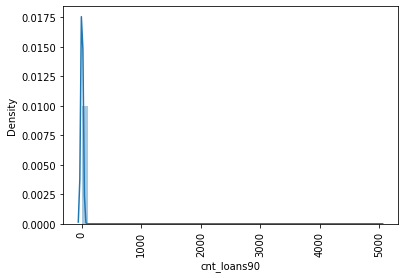

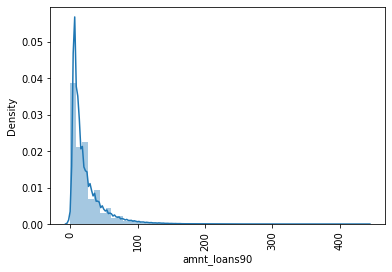

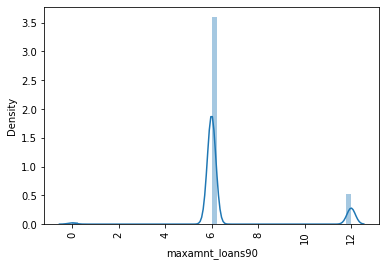

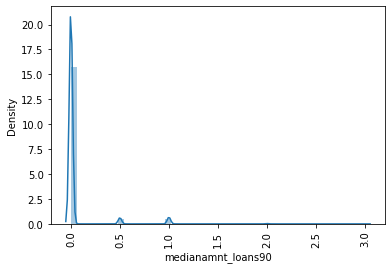

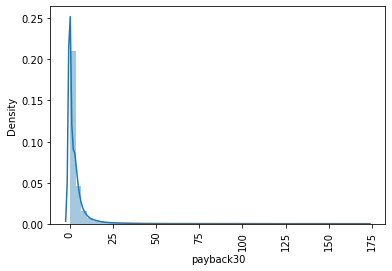

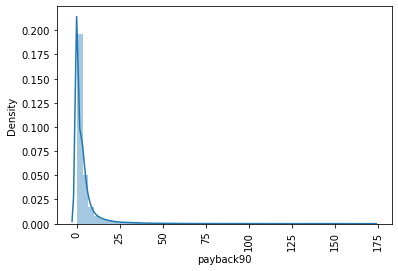

In [12]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

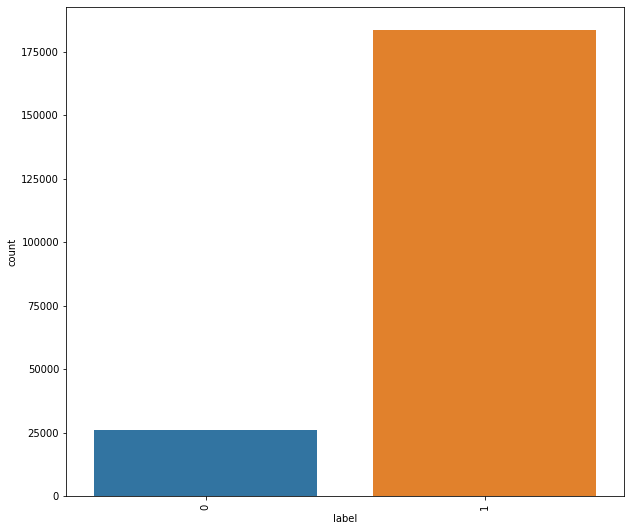

In [13]:
plt.figure(figsize=(10,9))
sns.countplot(df.label)
plt.xticks(rotation=90)

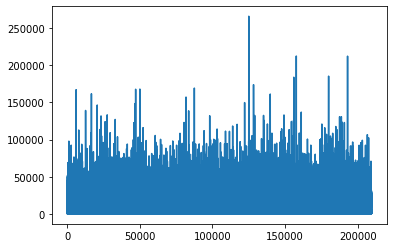

In [14]:
df.daily_decr30.plot()

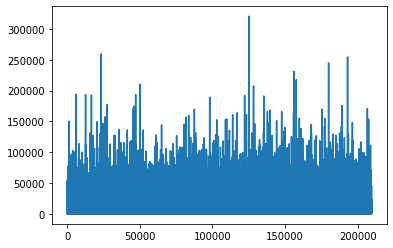

In [15]:
df.daily_decr90.plot()

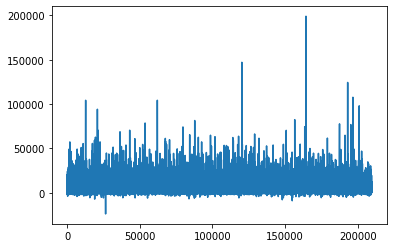

In [16]:
df.rental30.plot()

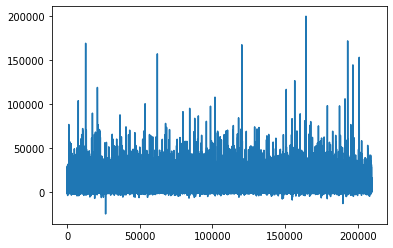

In [17]:
df.rental90.plot()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 <a list of 82 Text major ticklabel objects>)

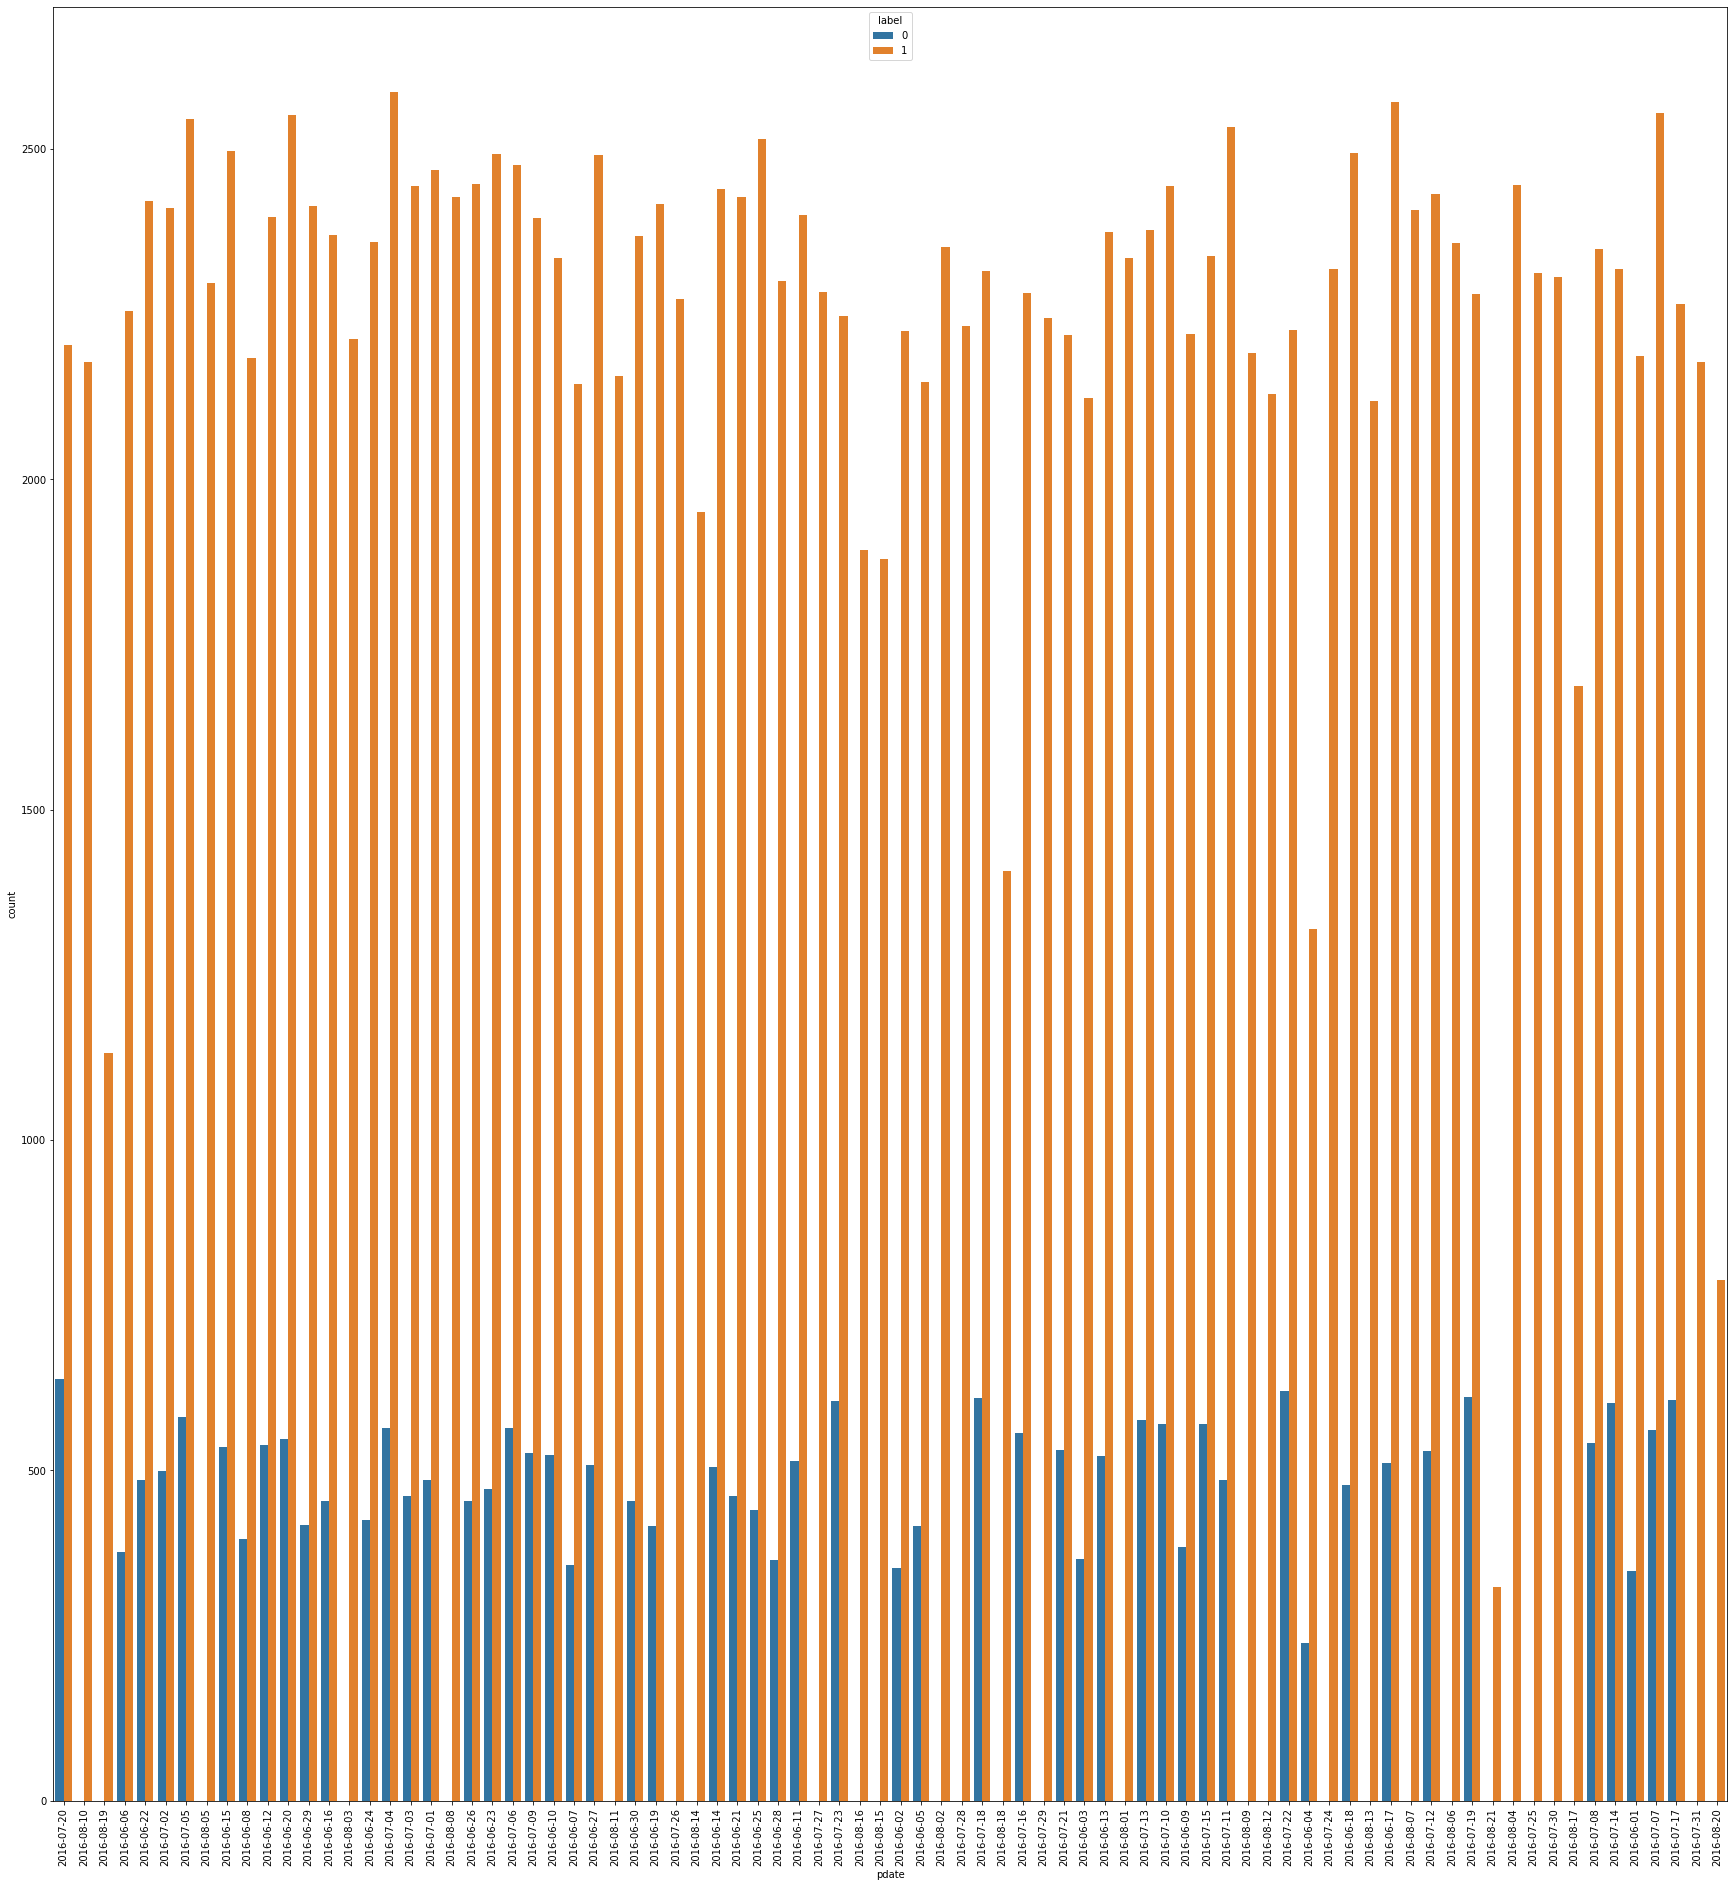

In [18]:
plt.figure(figsize=(30,33))
sns.countplot(x="pdate",hue="label",data=df)
plt.xticks(rotation=90)

In [19]:
#sns.pairplot(df)

In [20]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [21]:
le = LabelEncoder()
df['msisdn'] = le.fit_transform(df.msisdn.values)
df['pcircle'] = le.fit_transform(df.pcircle.values)
df['pdate'] = le.fit_transform(df.pdate.values)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37]), <a list of 37 Text major ticklabel objects>)

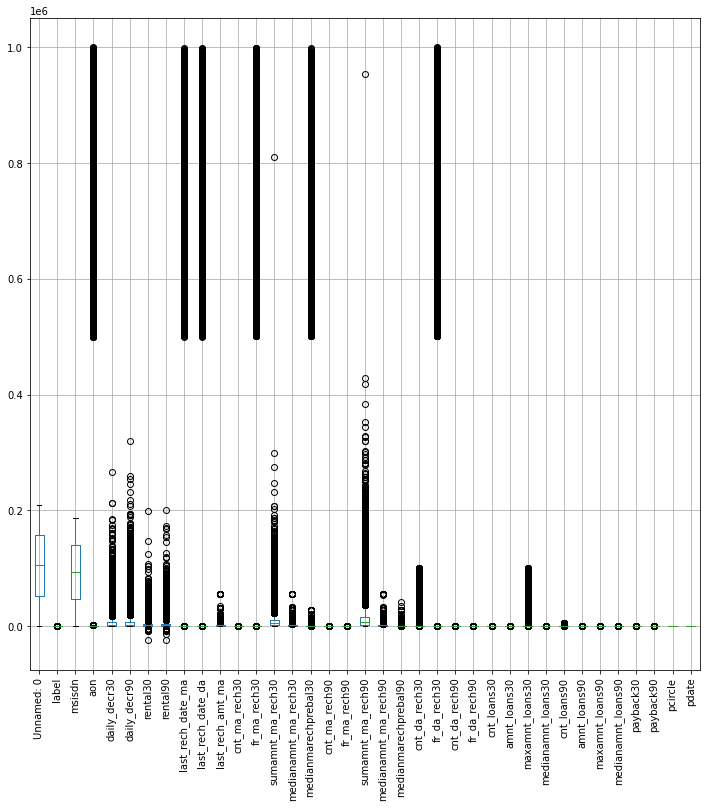

In [25]:
df.boxplot(figsize=(12,12));
plt.xticks(rotation=90)

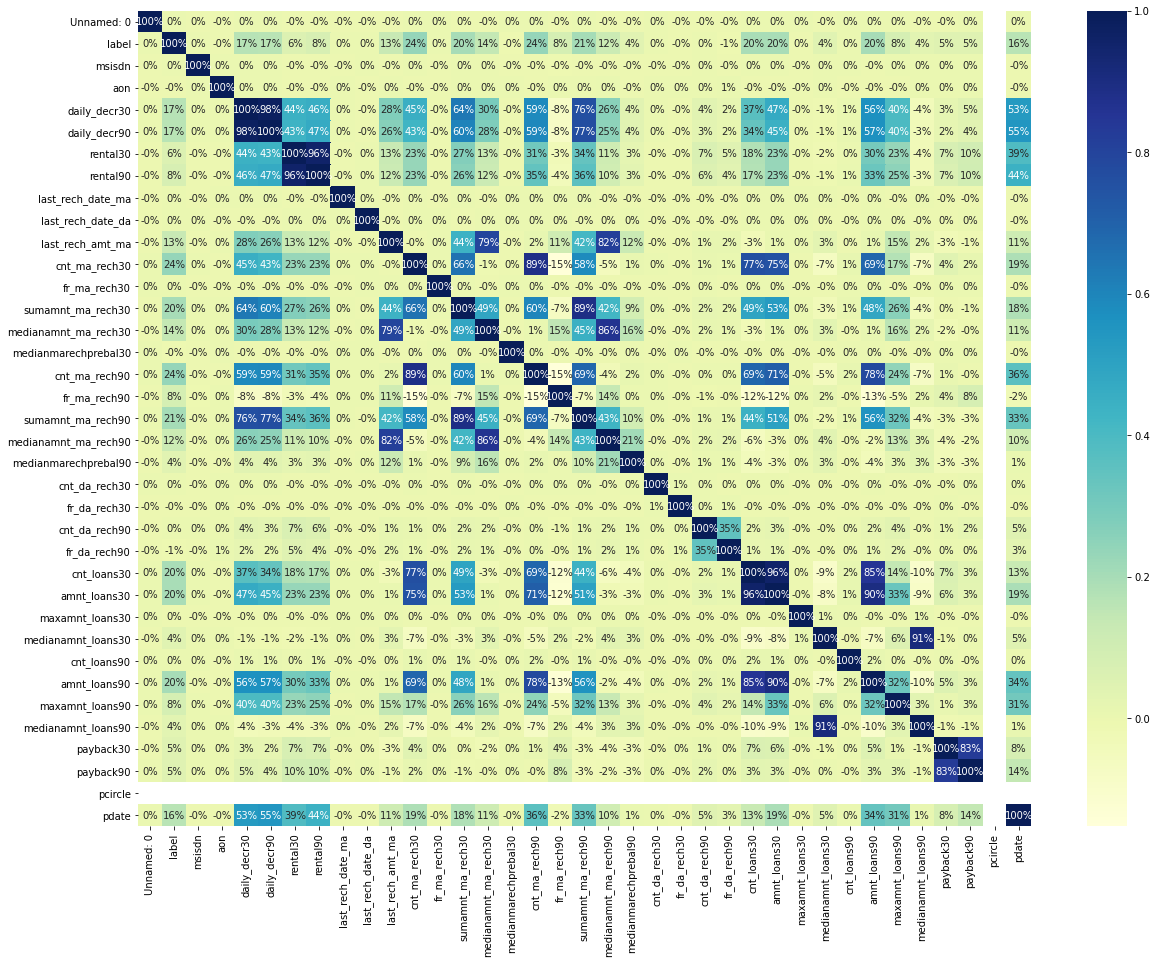

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),vmax=1,cmap='YlGnBu',annot=True,fmt='.0%')
plt.show()

In [27]:
df.corr()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
Unnamed: 0,1.000000,0.000403,0.000121,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,0.003320,0.003181,0.000123,-0.001371,0.001258,0.002329,-0.000249,0.000523,-0.000298,-0.001947,0.000888,-0.002504,-0.001324,-0.002827,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411,NaN,0.002509
label,0.000403,1.000000,0.001976,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,NaN,0.162687
msisdn,0.000121,0.001976,1.000000,0.000566,0.000717,0.000950,-0.001404,-0.000691,-0.000928,0.001400,-0.002368,0.000617,-0.001804,0.001094,0.000668,-0.000238,-0.001859,-0.004413,-0.000936,-0.000625,-0.000615,-0.001720,-0.000241,0.004595,-0.002233,0.001765,0.002170,-0.000755,0.000986,0.001859,-0.000155,0.003286,0.001210,0.002922,0.002671,NaN,-0.002085
aon,-0.002048,-0.003785,0.000566,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,NaN,-0.001650
daily_decr30,0.002739,0.168298,0.000717,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,NaN,0.534191
daily_decr90,0.003077,0.166150,0.000950,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,NaN,0.545599
rental30,-0.003906,0.058085,-0.001404,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,NaN,0.388352
rental90,-0.003459,0.075521,-0.000691,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,NaN,0.443884
last_rech_date_ma,-0.001853,0.003728,-0.000928,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,NaN,-0.000976
last_rech_date_da,-0.001133,0.001711,0.001400,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.00

In [28]:
y = df['label']
x = df.drop('label', axis=1)

In [29]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.43, random_state=0)
x.shape

(209593, 36)

In [30]:
y.shape

(209593,)

In [31]:

model=[LogisticRegression(), GaussianNB(var_smoothing=1e-09), DecisionTreeClassifier(),
       KNeighborsClassifier(weights='uniform',leaf_size=50,n_neighbors=5),SVC(),
       RandomForestClassifier(criterion='entropy',n_estimators=150,min_samples_leaf=4)]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_train)
    print('Accuracy Score of',m,'is :')
    print(accuracy_score(y_train,predm),'\n')
    print('Confusion Matrix',confusion_matrix(y_train,predm),'\n')
    print('Classification Report',classification_report(y_train,predm))
    print('\n')

Accuracy Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is :
0.8764104195265677 

Confusion Matrix [[   200  14623]
 [   142 104503]] 

Classification Report               precision    recall  f1-score   support

           0       0.58      0.01      0.03     14823
           1       0.88      1.00      0.93    104645

    accuracy                           0.88    119468
   macro avg       0.73      0.51      0.48    119468
weighted avg       0.84      0.88      0.82    119468



Accuracy Score of GaussianNB(priors=None, var_smoothing=1e-09) is :
0.5529848997221013 

Confusion Matrix [[13242  1581]
 [51823 52822]] 

Classification Report               precision    recall  f1-score   support

         

In [32]:
import joblib
joblib.dump(DecisionTreeClassifier(),'MCP_Data_File.obj')

['MCP_Data_File.obj']

In [33]:
lr=LogisticRegression()
max_score=0
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20,stratify=y)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('accuracy score at',i,'is',accuracy)
    if accuracy>max_score:
        max_score=accuracy
        final_state=i
print('max accuracy is ',max_score,'at',final_state)

accuracy score at 0 is 0.8756172618621627
accuracy score at 1 is 0.8755934063312579
accuracy score at 2 is 0.8758558171712112
accuracy score at 3 is 0.8760705169493547
accuracy score at 4 is 0.8754979842076386
accuracy score at 5 is 0.8762375056656886
accuracy score at 6 is 0.8751162957131611
accuracy score at 7 is 0.8754741286767337
accuracy score at 8 is 0.8754741286767337
accuracy score at 9 is 0.875569550800353
accuracy score at 10 is 0.8753071399603998
accuracy score at 11 is 0.8758081061094015
accuracy score at 12 is 0.8754741286767337
accuracy score at 13 is 0.8750685846513514
accuracy score at 14 is 0.8758081061094015
accuracy score at 15 is 0.8757126839857821
accuracy score at 16 is 0.8761897946038789
accuracy score at 17 is 0.8754741286767337
accuracy score at 18 is 0.8757842505784966
accuracy score at 19 is 0.8758558171712112
accuracy score at 20 is 0.875140151244066
accuracy score at 21 is 0.8753787065531143
accuracy score at 22 is 0.875426417614924
accuracy score at 23 is 

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20,stratify=y)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
test_accuracy=accuracy_score(y_test,y_pred)
train_accuracy=accuracy_score(y_train,train_pred)
train_accuracy,test_accuracy

(0.8756933096365567, 0.8756888284548773)

In [35]:
Gn=GaussianNB()
max_score=0
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20,stratify=y)
    Gn.fit(x_train,y_train)
    G_pred=Gn.predict(x_test)
    accuracy=accuracy_score(y_test,G_pred)
    print('accuracy score at',i,'is',accuracy)
    if accuracy>max_score:
        max_score=accuracy
        final_state=i
print('max accuracy is ',max_score,'at',final_state)

accuracy score at 0 is 0.5554521815883012
accuracy score at 1 is 0.5535675946468188
accuracy score at 2 is 0.5557384479591593
accuracy score at 3 is 0.5512774636799542
accuracy score at 4 is 0.553710727832248
accuracy score at 5 is 0.5514683079271929
accuracy score at 6 is 0.5536630167704383
accuracy score at 7 is 0.5565733915408287
accuracy score at 8 is 0.5551420596865383
accuracy score at 9 is 0.5545695269448222
accuracy score at 10 is 0.5524225291633865
accuracy score at 11 is 0.5567880913189723
accuracy score at 12 is 0.5549273599083948
accuracy score at 13 is 0.5563586917626852
accuracy score at 14 is 0.5510389083709057
accuracy score at 15 is 0.5574560461843079
accuracy score at 16 is 0.5511104749636203
accuracy score at 17 is 0.548915766120375
accuracy score at 18 is 0.558624967198645
accuracy score at 19 is 0.5545695269448222
accuracy score at 20 is 0.5544263937593931
accuracy score at 21 is 0.554450249290298
accuracy score at 22 is 0.554283260573964
accuracy score at 23 is 0.

In [36]:
# AUC ROC Curve

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [38]:
lr_TS_auc=roc_auc_score(y_test,y_pred)
lr_TR_auc=roc_auc_score(y_train,train_pred)

In [39]:
lr_TS_auc,lr_TR_auc

(0.5079063406581288, 0.5076494223429792)

In [40]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [41]:
fpr

array([0.        , 0.98222477, 1.        ])

In [42]:
tpr

array([0.        , 0.99803745, 1.        ])

In [43]:
thresholds

array([2, 1, 0])

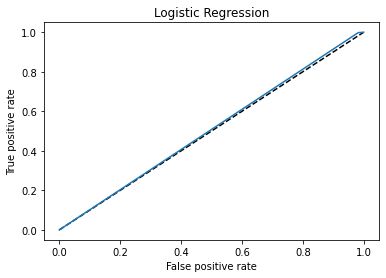

In [44]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

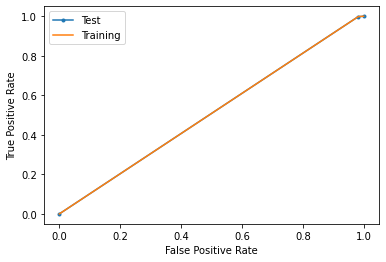

In [45]:

plt.plot(fpr,tpr,marker='.',label='Test')
plt.plot(fpr,tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [46]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))

In [47]:
print(auc_score)

0.5079063406581288


In [48]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))

0.8826069324172809


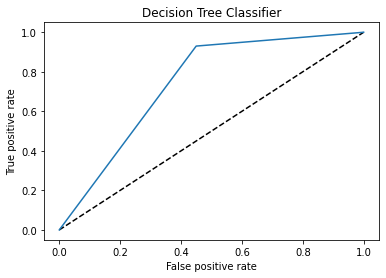

0.7401350186414555

In [49]:
#Decision Tree Curve
y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

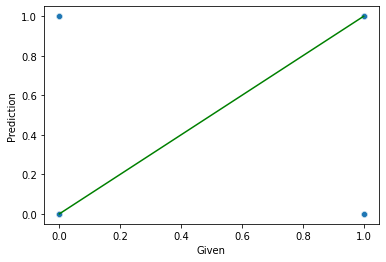

In [50]:
k = sns.scatterplot(y_test, y_pred)
k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,1,5)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='g')

In [51]:
target1=pd.DataFrame({'Actual ':y_test,'Predicted ':y_pred})
target1

,Actual,Predicted
83337,1,1
148519,0,1
57079,1,1
79145,0,1
54578,1,1
...,...,...
42118,1,1
135030,1,1
100107,1,1
124998,1,1


In [53]:
target.to_csv('MCP_Data_Target.csv')